# Happymonk: Learning activations in neural network

#### By Pradyumna Yadav

#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data = pd.read_csv('BankNote_Authentication.csv')
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [6]:
X = data.drop('class',axis=1)
y = data['class']

In [7]:
y = np.array(y).reshape(-1,1)

In [8]:
classes = data['class'].unique()

In [9]:
classes

array([0, 1])

<AxesSubplot:>

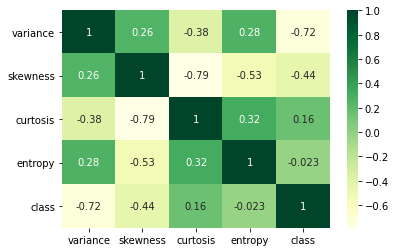

In [12]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='YlGn')

#  Splitting train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.28,random_state=42)

In [14]:
X_train = X_train.T
y_train = y_train.T

X_test = X_test.T
y_test = y_test.T

print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

X_train: (4, 987)
y_train: (1, 987)


# Building a 1-hidden layer Neural Network

Our goal is to determine the activation function at the hidden layer in the form of g(z) = K0 + K1*z

In [15]:
def model(X,y):
    input_layer = X.shape[0]
    hidden_layer = 4
    output_layer = y.shape[0]
    return (input_layer, hidden_layer, output_layer)

(input_layer,hidden_layer,output_layer) = model(X_train,y_train)

print("input_shape: {}".format(input_layer))
print("hidden_shape: {}".format(hidden_layer))
print("output_shape: {}".format(output_layer))

input_shape: 4
hidden_shape: 4
output_shape: 1


In [16]:
def parameter_declare(input_unit, hidden_unit, output_unit):
    np.random.seed(2)
    W1 = np.random.randn(hidden_unit,input_unit)*0.01
    b1 = np.random.randn(hidden_unit,1)
    W2 = np.random.randn(output_unit,hidden_unit)*0.01
    b2 = np.random.randn(output_unit,1)
    k0 = np.random.randn(1,1)
    k1 = np.random.randn(1,1)
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2,
                  "k0":k0,
                  "k1":k1}
    return parameters

In [36]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def hidden_activation(z,k0,k1):
    return k0 + k1*z 
    # return np.tanh(z)

def forward_propagation(X, parameters,param_list):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
#     k0 = parameters['k0']
#     k1 = parameters['k1']
    
    k0 = np.array(param_list['k0'])[-1][0][0]
    k1 = np.array(param_list['k1'])[-1][0][0]
    
    Z1 = np.dot(W1,X) + b1
    A1 = hidden_activation(Z1,k0,k1) # might require some changes
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    return A2, cache

In [18]:
def cross_entropy(A2, Y, parameters):
    m = Y.shape[1] # no. of training examples
    logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    return cost

In [19]:
def backpropagation(parameters, cache, X,Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T,dZ2)  # may occur error due to shape..try interchange
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    dk0 = (1/m)*np.mean(dA1,axis = 0)
    dk1 = (1/m)*np.mean(np.multiply(Z1,dA1),axis = 0)
    
#     print("asdfasdf",dk0.shape)
#     print("qwerqwer",dk0)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2,"dk0":dk0,"dk1":dk1}
    return grads

In [20]:
def gradient_descent(parameters, grads, learning_rate = 0.01):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    k0 = parameters['k0']
    k1 = parameters['k1']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dk0 = grads['dk0']
    dk1 = grads['dk1']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    k0 = k0 - learning_rate * dk0
    k1 = k1 - learning_rate * dk1
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2,"k0":k0,"k1":k1}
    
    return parameters

#  Training

In [21]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 1000):
    np.random.seed(3)
    input_unit = model(X, Y)[0]
    output_unit = model(X, Y)[2]
    
    parameters = parameter_declare(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    k0 = parameters['k0']
    k1 = parameters['k1']
    
    loss_function = []
    
    param_list = {"W1":[],"b1":[],"W2":[],"b2":[],"k0":[],"k1":[]}
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters, param_list)
        cost = cross_entropy(A2, Y, parameters)
        grads = backpropagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if(i==489):
            cost = loss_function[480]
        loss_function.append(cost)
        param_list['W1'].append(parameters['W1'])
        param_list['b1'].append(parameters['b1'])
        param_list['W2'].append(parameters['W2'])
        param_list['b2'].append(parameters['b2'])
        param_list['k0'].append(parameters['k0'])
        param_list['k1'].append(parameters['k1'])
        print("Cost after iteration {}: cost: {}".format(i, cost))
    return parameters, loss_function, param_list

parameters,loss_function,param_list = neural_network_model(X_train, y_train, 4, 
                                  num_iterations=1000)

Cost after iteration 0: cost: 0.688804329905446
Cost after iteration 1: cost: 0.6887726532986502
Cost after iteration 2: cost: 0.6887413959879329
Cost after iteration 3: cost: 0.6887105538087959
Cost after iteration 4: cost: 0.6886801225502476
Cost after iteration 5: cost: 0.6886500979545466
Cost after iteration 6: cost: 0.6886204757170175
Cost after iteration 7: cost: 0.6885912514859386
Cost after iteration 8: cost: 0.6885624208625024
Cost after iteration 9: cost: 0.6885339794008487
Cost after iteration 10: cost: 0.6885059226081648
Cost after iteration 11: cost: 0.6884782459448607
Cost after iteration 12: cost: 0.6884509448248092
Cost after iteration 13: cost: 0.6884240146156573
Cost after iteration 14: cost: 0.6883974506392042
Cost after iteration 15: cost: 0.6883712481718468
Cost after iteration 16: cost: 0.6883454024450909
Cost after iteration 17: cost: 0.6883199086461296
Cost after iteration 18: cost: 0.6882947619184818
Cost after iteration 19: cost: 0.6882699573627002
Cost after 

Cost after iteration 247: cost: 0.6828549810480001
Cost after iteration 248: cost: 0.6827895716233758
Cost after iteration 249: cost: 0.6827225578677975
Cost after iteration 250: cost: 0.6826538771669157
Cost after iteration 251: cost: 0.6825834641261005
Cost after iteration 252: cost: 0.6825112504240458
Cost after iteration 253: cost: 0.6824371646569617
Cost after iteration 254: cost: 0.682361132172655
Cost after iteration 255: cost: 0.68228307489374
Cost after iteration 256: cost: 0.6822029111291599
Cost after iteration 257: cost: 0.6821205553731281
Cost after iteration 258: cost: 0.6820359180905207
Cost after iteration 259: cost: 0.6819489054876753
Cost after iteration 260: cost: 0.6818594192674519
Cost after iteration 261: cost: 0.6817673563673202
Cost after iteration 262: cost: 0.681672608679123
Cost after iteration 263: cost: 0.6815750627490473
Cost after iteration 264: cost: 0.6814745994562055
Cost after iteration 265: cost: 0.6813710936680832
Cost after iteration 266: cost: 0.6

Cost after iteration 539: cost: 0.11535390160106451
Cost after iteration 540: cost: 0.114854948044113
Cost after iteration 541: cost: 0.11436627935593144
Cost after iteration 542: cost: 0.11388764981969392
Cost after iteration 543: cost: 0.11341882128549698
Cost after iteration 544: cost: 0.11295956279091583
Cost after iteration 545: cost: 0.11250965021119858
Cost after iteration 546: cost: 0.11206886593575499
Cost after iteration 547: cost: 0.11163699856807374
Cost after iteration 548: cost: 0.11121384264660078
Cost after iteration 549: cost: 0.11079919838445053
Cost after iteration 550: cost: 0.11039287142610683
Cost after iteration 551: cost: 0.10999467261951319
Cost after iteration 552: cost: 0.109604417802158
Cost after iteration 553: cost: 0.1092219275999351
Cost after iteration 554: cost: 0.10884702723771097
Cost after iteration 555: cost: 0.10847954636065683
Cost after iteration 556: cost: 0.10811931886551475
Cost after iteration 557: cost: 0.10776618274106047
Cost after iterat

<ipython-input-18-5c7f9288a135>:3: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))
<ipython-input-18-5c7f9288a135>:3: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(np.log(A2),Y) + np.multiply((1-Y),np.log(1-A2))


Cost after iteration 588: cost: 0.09960335587726829
Cost after iteration 589: cost: 0.09941014947015107
Cost after iteration 590: cost: 0.09922029536032279
Cost after iteration 591: cost: 0.09903371537119972
Cost after iteration 592: cost: 0.09885033288271752
Cost after iteration 593: cost: 0.09867007280365364
Cost after iteration 594: cost: 0.09849286154499469
Cost after iteration 595: cost: 0.09831862699427477
Cost after iteration 596: cost: 0.09814729849081333
Cost after iteration 597: cost: 0.0979788068017855
Cost after iteration 598: cost: 0.09781308409906003
Cost after iteration 599: cost: 0.09765006393674464
Cost after iteration 600: cost: 0.09748968122938105
Cost after iteration 601: cost: 0.09733187223073543
Cost after iteration 602: cost: 0.09717657451313362
Cost after iteration 603: cost: 0.0970237269472928
Cost after iteration 604: cost: 0.09687326968260539
Cost after iteration 605: cost: 0.09672514412783298
Cost after iteration 606: cost: 0.09657929293217175
Cost after ite

Cost after iteration 835: cost: 0.08038974803142081
Cost after iteration 836: cost: 0.08033990543372893
Cost after iteration 837: cost: 0.08029013983596492
Cost after iteration 838: cost: 0.08024045097315805
Cost after iteration 839: cost: 0.08019083858271091
Cost after iteration 840: cost: 0.08014130240435136
Cost after iteration 841: cost: 0.08009184218008585
Cost after iteration 842: cost: 0.08004245765415416
Cost after iteration 843: cost: 0.0799931485729852
Cost after iteration 844: cost: 0.07994391468515419
Cost after iteration 845: cost: 0.07989475574134078
Cost after iteration 846: cost: 0.07984567149428871
Cost after iteration 847: cost: 0.0797966616987661
Cost after iteration 848: cost: 0.0797477261115271
Cost after iteration 849: cost: 0.07969886449127458
Cost after iteration 850: cost: 0.07965007659862365
Cost after iteration 851: cost: 0.07960136219606626
Cost after iteration 852: cost: 0.07955272104793681
Cost after iteration 853: cost: 0.07950415292037852
Cost after iter

##  Test and Train Accuracy

In [37]:
def prediction(parameters, X):
    A2, cache = forward_propagation(X, parameters, param_list)
    predictions = np.round(A2)
    
    return predictions

predictions = prediction(parameters, X_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
predictions = prediction(parameters, X_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Accuracy Train: 95%
Accuracy Test: 95%


#  Parameter updates at each epoch

###  Weight matrix for input and hidden layer: W1

In [23]:
for i in range(1000):
    print(param_list['W1'][i][:])

[[-0.00408107 -0.00045297 -0.02139855  0.01640773]
 [-0.01793424 -0.00841741  0.00503125 -0.01245365]
 [-0.01060386 -0.00912038  0.00552511  0.02292036]
 [ 0.00050986 -0.01106103  0.00535562 -0.00595673]]
[[-0.00399425 -0.00034286 -0.02143525  0.01641275]
 [-0.0179341  -0.00841732  0.00503444 -0.01245466]
 [-0.01062743 -0.00914973  0.00553534  0.02291869]
 [ 0.00060601 -0.01094068  0.00532003 -0.00595178]]
[[-0.00390714 -0.00023238 -0.02147205  0.01641778]
 [-0.01793391 -0.00841721  0.00503837 -0.0124559 ]
 [-0.01065022 -0.00917811  0.00554522  0.02291708]
 [ 0.0007038  -0.01081822  0.00528379 -0.00594676]]
[[-0.00381975 -0.00012153 -0.02150895  0.01642281]
 [-0.01793369 -0.00841708  0.00504305 -0.01245738]
 [-0.01067222 -0.0092055   0.00555476  0.02291554]
 [ 0.00080323 -0.01069368  0.00524693 -0.00594168]]
[[-3.73210702e-03 -1.03507443e-05 -2.15459379e-02  1.64278420e-02]
 [-1.79334359e-02 -8.41692953e-03  5.04846876e-03 -1.24590963e-02]
 [-1.06934132e-02 -9.23190784e-03  5.56393527e

 [ 0.00724707 -0.00256608  0.0022533  -0.00545   ]]
[[-0.01001065 -0.00816257 -0.01961958  0.0163949 ]
 [-0.03726347 -0.05324364  0.09864529 -0.02984088]
 [ 0.00462397  0.01028369 -0.0001328   0.02348082]
 [ 0.00706816 -0.00279085  0.0023071  -0.00545466]]
[[-0.01010432 -0.0082815  -0.01959087  0.01639292]
 [-0.03786624 -0.05461834  0.1008388  -0.03015644]
 [ 0.00462458  0.01028445 -0.00013296  0.02348083]
 [ 0.00688897 -0.00301578  0.00236055 -0.00545929]]
[[-0.01019722 -0.00839932 -0.01956259  0.01639097]
 [-0.03849418 -0.05605127  0.1031121  -0.03048098]
 [ 0.00462423  0.01028401 -0.00013287  0.02348083]
 [ 0.00670953 -0.00324082  0.00241363 -0.0054639 ]]
[[-0.01028933 -0.00851601 -0.01953475  0.01638902]
 [-0.03914878 -0.05754588  0.10546944 -0.03081487]
 [ 0.00462292  0.01028238 -0.00013251  0.02348081]
 [ 0.00652987 -0.00346593  0.00246632 -0.00546848]]
[[-0.01038063 -0.00863157 -0.01950737  0.0163871 ]
 [-0.03983162 -0.05910589  0.10791537 -0.03115849]
 [ 0.00462067  0.01027956 

 [-9.45982094e-03 -1.04237591e-02 -3.15855068e-03 -9.17485459e-03]]
[[-1.35851479e-02 -1.29206721e-02 -1.87312753e-02  1.64698854e-02]
 [-3.19793536e+00 -4.18492203e+00  7.06459172e-01  5.27884244e-02]
 [ 6.43341525e-04  1.08125378e-02 -2.97541913e-03  2.19215169e-02]
 [-9.51705405e-03 -1.03810266e-02 -3.21712465e-03 -9.20831313e-03]]
[[-1.35444758e-02 -1.29512332e-02 -1.86898245e-02  1.64937508e-02]
 [-3.26458364e+00 -4.27409467e+00  7.13279145e-01  4.91676195e-02]
 [ 5.76721130e-04  1.08619978e-02 -3.04303880e-03  2.18824716e-02]
 [-9.57320520e-03 -1.03391797e-02 -3.27446960e-03 -9.24111846e-03]]
[[-1.35026993e-02 -1.29825597e-02 -1.86473465e-02  1.65182533e-02]
 [-3.33267199e+00 -4.36573468e+00  7.20836740e-01  4.54877091e-02]
 [ 5.09185588e-04  1.09120381e-02 -3.11142670e-03  2.18429015e-02]
 [-9.62827411e-03 -1.02982299e-02 -3.33058404e-03 -9.27326658e-03]]
[[-1.34598142e-02 -1.30146411e-02 -1.86038464e-02  1.65433912e-02]
 [-3.40225643e+00 -4.45994420e+00  7.29166542e-01  4.17536

 [-1.19036684e-02 -1.04581406e-02 -6.23608814e-04 -1.07813409e-02]]
[[-1.02622986e-02 -1.85062590e-02 -6.12397655e-03  1.81656619e-02]
 [-1.95888273e+01 -9.90169127e+00 -1.00661435e+01 -6.34004704e+00]
 [-3.89629749e-03  1.74180413e-02 -1.71522152e-02  1.93789235e-02]
 [-1.19107747e-02 -1.04567373e-02 -6.08166768e-04 -1.07902417e-02]]
[[-1.02734327e-02 -1.85034561e-02 -6.10010863e-03  1.81514777e-02]
 [-1.95887931e+01 -9.90364357e+00 -1.00693054e+01 -6.34016205e+00]
 [-3.88501136e-03  1.74155797e-02 -1.71761421e-02  1.93926607e-02]
 [-1.19178953e-02 -1.04553263e-02 -5.92703091e-04 -1.07991661e-02]]
[[-1.02845816e-02 -1.85006417e-02 -6.07622390e-03  1.81372659e-02]
 [-1.95887580e+01 -9.90559825e+00 -1.00724592e+01 -6.34027222e+00]
 [-3.87371295e-03  1.74131078e-02 -1.72000802e-02  1.94064213e-02]
 [-1.19250302e-02 -1.04539077e-02 -5.77217756e-04 -1.08081139e-02]]
[[-1.02957452e-02 -1.84978160e-02 -6.05232225e-03  1.81230268e-02]
 [-1.95887220e+01 -9.90755520e+00 -1.00756049e+01 -6.34037

 [-1.30603070e-02 -1.02233804e-02  1.82332187e-03 -1.22706301e-02]]
[[-1.20016793e-02 -1.80568883e-02 -2.49481048e-03  1.58883068e-02]
 [-1.95770725e+01 -1.01805601e+01 -1.04637247e+01 -6.32706597e+00]
 [-2.15990951e-03  1.70287034e-02 -2.07342974e-02  2.15488422e-02]
 [-1.30691886e-02 -1.02217410e-02  1.84183225e-03 -1.22822483e-02]]
[[-1.20146182e-02 -1.80537672e-02 -2.46823470e-03  1.58710872e-02]
 [-1.95769530e+01 -1.01823889e+01 -1.04661902e+01 -6.32684900e+00]
 [-2.14716286e-03  1.70260604e-02 -2.07601651e-02  2.15650168e-02]
 [-1.30780806e-02 -1.02201036e-02  1.86036233e-03 -1.22938820e-02]]
[[-1.20275676e-02 -1.80506489e-02 -2.44164066e-03  1.58538509e-02]
 [-1.95768331e+01 -1.01842158e+01 -1.04686525e+01 -6.32663089e+00]
 [-2.13440791e-03  1.70234207e-02 -2.07860459e-02  2.15812041e-02]
 [-1.30869833e-02 -1.02184681e-02  1.87891208e-03 -1.23055312e-02]]
[[-1.20405277e-02 -1.80475334e-02 -2.41502838e-03  1.58365978e-02]
 [-1.95767127e+01 -1.01860407e+01 -1.04711117e+01 -6.32641

###  Bias matrix for input and hidden layer: b1

In [24]:
for i in range(1000):
    print(param_list['b1'][i][:])

[[-0.01913288]
 [ 1.17500184]
 [-0.74787008]
 [ 0.00902317]]
[[-0.01913526]
 [ 1.17500266]
 [-0.74786924]
 [ 0.00902105]]
[[-0.01913764]
 [ 1.17500367]
 [-0.74786843]
 [ 0.00901891]]
[[-0.01914001]
 [ 1.17500487]
 [-0.74786765]
 [ 0.00901675]]
[[-0.01914238]
 [ 1.17500627]
 [-0.7478669 ]
 [ 0.00901455]]
[[-0.01914475]
 [ 1.17500785]
 [-0.74786619]
 [ 0.00901234]]
[[-0.0191471 ]
 [ 1.17500962]
 [-0.7478655 ]
 [ 0.00901009]]
[[-0.01914946]
 [ 1.17501158]
 [-0.74786485]
 [ 0.00900783]]
[[-0.0191518 ]
 [ 1.17501373]
 [-0.74786423]
 [ 0.00900554]]
[[-0.01915414]
 [ 1.17501606]
 [-0.74786365]
 [ 0.00900322]]
[[-0.01915647]
 [ 1.17501859]
 [-0.74786309]
 [ 0.00900089]]
[[-0.01915879]
 [ 1.1750213 ]
 [-0.74786257]
 [ 0.00899853]]
[[-0.01916111]
 [ 1.17502419]
 [-0.74786207]
 [ 0.00899614]]
[[-0.01916342]
 [ 1.17502727]
 [-0.74786161]
 [ 0.00899374]]
[[-0.01916571]
 [ 1.17503053]
 [-0.74786119]
 [ 0.00899131]]
[[-0.019168  ]
 [ 1.17503398]
 [-0.74786079]
 [ 0.00898887]]
[[-0.01917028]
 [ 1.1750

[[-0.01925355]
 [ 1.17989594]
 [-0.74801617]
 [ 0.00865665]]
[[-0.01925307]
 [ 1.17995565]
 [-0.74801615]
 [ 0.00865793]]
[[-0.01925261]
 [ 1.18001615]
 [-0.74801611]
 [ 0.00865922]]
[[-0.01925216]
 [ 1.18007748]
 [-0.74801606]
 [ 0.00866052]]
[[-0.01925173]
 [ 1.18013965]
 [-0.74801601]
 [ 0.00866183]]
[[-0.01925131]
 [ 1.18020267]
 [-0.74801594]
 [ 0.00866315]]
[[-0.01925091]
 [ 1.18026656]
 [-0.74801586]
 [ 0.00866448]]
[[-0.01925052]
 [ 1.18033135]
 [-0.74801577]
 [ 0.00866582]]
[[-0.01925015]
 [ 1.18039706]
 [-0.74801567]
 [ 0.00866715]]
[[-0.01924979]
 [ 1.1804637 ]
 [-0.74801556]
 [ 0.0086685 ]]
[[-0.01924945]
 [ 1.1805313 ]
 [-0.74801544]
 [ 0.00866984]]
[[-0.01924913]
 [ 1.18059988]
 [-0.74801532]
 [ 0.00867119]]
[[-0.01924882]
 [ 1.18066946]
 [-0.74801518]
 [ 0.00867253]]
[[-0.01924853]
 [ 1.18074007]
 [-0.74801504]
 [ 0.00867388]]
[[-0.01924826]
 [ 1.18081172]
 [-0.74801489]
 [ 0.00867522]]
[[-0.019248  ]
 [ 1.18088446]
 [-0.74801473]
 [ 0.00867656]]
[[-0.01924776]
 [ 1.1809

 [ 0.00653137]]
[[-0.02437662]
 [ 4.02519534]
 [-0.74244095]
 [ 0.00652301]]
[[-0.02438857]
 [ 4.03006083]
 [-0.74242901]
 [ 0.00651463]]
[[-0.02440052]
 [ 4.03492125]
 [-0.74241706]
 [ 0.00650626]]
[[-0.02441248]
 [ 4.03977663]
 [-0.74240511]
 [ 0.00649788]]
[[-0.02442444]
 [ 4.04462697]
 [-0.74239316]
 [ 0.00648949]]
[[-0.02443641]
 [ 4.04947228]
 [-0.74238121]
 [ 0.00648109]]
[[-0.02444838]
 [ 4.05431256]
 [-0.74236926]
 [ 0.00647269]]
[[-0.02446035]
 [ 4.05914783]
 [-0.74235731]
 [ 0.00646428]]
[[-0.02447233]
 [ 4.0639781 ]
 [-0.74234535]
 [ 0.00645587]]
[[-0.02448432]
 [ 4.06880338]
 [-0.74233339]
 [ 0.00644745]]
[[-0.0244963 ]
 [ 4.07362366]
 [-0.74232143]
 [ 0.00643902]]
[[-0.02450829]
 [ 4.07843897]
 [-0.74230947]
 [ 0.00643059]]
[[-0.02452029]
 [ 4.08324931]
 [-0.7422975 ]
 [ 0.00642215]]
[[-0.02453228]
 [ 4.08805469]
 [-0.74228553]
 [ 0.00641371]]
[[-0.02454429]
 [ 4.09285511]
 [-0.74227357]
 [ 0.00640526]]
[[-0.02455629]
 [ 4.09765059]
 [-0.7422616 ]
 [ 0.0063968 ]]
[[-0.024

###  Weight matrix for hidden and output layer: W2

In [25]:
for i in range(1000):
    print(param_list['W2'][i][:][0])

[-0.00881308 -0.00204601  0.00248416 -0.0100615 ]
[-0.00884316 -0.00252579  0.00240168 -0.01023306]
[-0.00887131 -0.00300372  0.00231828 -0.01040246]
[-0.00889753 -0.00347978  0.00223397 -0.01056967]
[-0.00892182 -0.00395401  0.00214876 -0.01073465]
[-0.00894417 -0.00442642  0.00206269 -0.01089739]
[-0.00896459 -0.004897    0.00197576 -0.01105785]
[-0.00898307 -0.00536579  0.001888   -0.01121601]
[-0.0089996  -0.00583279  0.00179941 -0.01137185]
[-0.0090142  -0.00629801  0.00171002 -0.01152534]
[-0.00902684 -0.00676147  0.00161985 -0.01167645]
[-0.00903755 -0.00722318  0.00152891 -0.01182516]
[-0.0090463  -0.00768315  0.00143722 -0.01197144]
[-0.00905311 -0.00814139  0.00134481 -0.01211528]
[-0.00905798 -0.00859792  0.00125168 -0.01225664]
[-0.0090609  -0.00905274  0.00115786 -0.01239551]
[-0.00906188 -0.00950588  0.00106336 -0.01253186]
[-0.00906091 -0.00995734  0.00096821 -0.01266567]
[-0.009058   -0.01040713  0.00087242 -0.01279692]
[-0.00905315 -0.01085527  0.00077601 -0.01292558]


[ 0.01104034 -0.08749259 -0.00646023  0.01178969]
[ 0.01107031 -0.08789199 -0.00637012  0.01197133]
[ 0.01109847 -0.08829382 -0.00627916  0.01215118]
[ 0.01112481 -0.08869815 -0.00618738  0.01232922]
[ 0.01114933 -0.08910505 -0.00609478  0.01250541]
[ 0.01117202 -0.08951459 -0.00600138  0.01267973]
[ 0.01119288 -0.08992685 -0.00590721  0.01285214]
[ 0.01121192 -0.09034188 -0.00581229  0.01302262]
[ 0.01122911 -0.09075977 -0.00571663  0.01319115]
[ 0.01124447 -0.0911806  -0.00562025  0.01335768]
[ 0.011258   -0.09160444 -0.00552317  0.01352221]
[ 0.01126968 -0.09203137 -0.00542542  0.01368469]
[ 0.01127953 -0.09246149 -0.00532701  0.01384511]
[ 0.01128753 -0.09289486 -0.00522796  0.01400344]
[ 0.0112937  -0.09333158 -0.00512829  0.01415965]
[ 0.01129802 -0.09377175 -0.00502803  0.01431372]
[ 0.01130051 -0.09421545 -0.00492719  0.01446563]
[ 0.01130116 -0.09466278 -0.0048258   0.01461534]
[ 0.01129998 -0.09511384 -0.00472387  0.01476285]
[ 0.01129696 -0.09556874 -0.00462142  0.01490812]


[-0.02143012 -0.14428827  0.02398506 -0.0062706 ]
[-0.02154965 -0.14458483  0.02410052 -0.00640674]
[-0.02166861 -0.14492397  0.02421538 -0.00654208]
[-0.02178699 -0.14530044  0.02432963 -0.0066766 ]
[-0.02190477 -0.14570957  0.02444327 -0.00681031]
[-0.02202197 -0.14614719  0.02455628 -0.0069432 ]
[-0.02213858 -0.1466096   0.02466866 -0.00707527]
[-0.02225459 -0.1470935   0.0247804  -0.00720652]
[-0.02237001 -0.14759598  0.02489152 -0.00733695]
[-0.02248483 -0.14811442  0.02500199 -0.00746656]
[-0.02259906 -0.14864652  0.02511184 -0.00759535]
[-0.02271271 -0.14919022  0.02522105 -0.00772332]
[-0.02282576 -0.1497437   0.02532963 -0.00785049]
[-0.02293824 -0.15030534  0.02543759 -0.00797686]
[-0.02305014 -0.15087369  0.02554492 -0.00810243]
[-0.02316147 -0.15144748  0.02565163 -0.00822721]
[-0.02327223 -0.15202556  0.02575773 -0.00835121]
[-0.02338243 -0.15260692  0.02586322 -0.00847443]
[-0.02349207 -0.15319067  0.0259681  -0.00859688]
[-0.02360117 -0.15377598  0.02607238 -0.00871858]


###  Bias matrix for hidden and output layer: b2

In [26]:
for i in range(1000):
    print(param_list['b2'][i][:][0][0])

-0.3385401656853555
-0.33826027337671766
-0.33798227764795535
-0.3377061670927907
-0.3374319303540259
-0.33715955612357995
-0.33688903314253205
-0.33662035020117087
-0.33635349613905047
-0.33608845984505215
-0.3358252302574529
-0.3355637963639998
-0.33530414720199053
-0.33504627185836044
-0.33479015946977536
-0.33453579922273086
-0.3342831803536573
-0.33403229214903124
-0.33378312394549275
-0.3335356651299688
-0.33328990513980244
-0.3330458334628884
-0.3328034396378141
-0.3325627132540069
-0.3323236439518869
-0.33208622142302613
-0.3318504354103127
-0.3316162757081215
-0.33138373216248995
-0.3311527946712997
-0.3309234531844641
-0.3306956977041207
-0.3304695182848298
-0.3302449050337779
-0.330021848110987
-0.3298003377295289
-0.32958036415574476
-0.3293619177094701
-0.32914498876426446
-0.3289295677476465
-0.3287156451413338
-0.32850321148148753
-0.3282922573589622
-0.3280827734195597
-0.32787475036428804
-0.3276681789496249
-0.32746304998778536
-0.3272593543469938
-0.32705708295176045

-0.22094497035027102
-0.22046463761519003
-0.21998690850842195
-0.2195117504469429
-0.21903913102910402
-0.21856901806350088
-0.21810137959390788
-0.21763618392071205
-0.21717339961923446
-0.2167129955552857
-0.21625494089826525
-0.21579920513208142
-0.21534575806413947
-0.21489456983261873
-0.21444561091223696
-0.21399885211867847
-0.21355426461184449
-0.21311181989806724
-0.21267148983141443
-0.21223324661419735
-0.21179706279678384
-0.21136291127680687
-0.21093076529784952
-0.21050059844767857
-0.21007238465609143
-0.2096460981924338
-0.20922171366283923
-0.20879920600723645
-0.20837855049616463
-0.20795972272743274
-0.2075426986226546
-0.20712745442368788
-0.20671396668900163
-0.20630221228999393
-0.20589216840727875
-0.20548381252695852
-0.2050771224368966
-0.204672076223002
-0.20426865226553667
-0.20386682923545488
-0.20346658609078117
-0.20306790207303388
-0.20267075670369897
-0.20227512978075807
-0.20188100137527384
-0.2014883518280351
-0.20109716174626305
-0.20070741200037964


-0.09262566734859928
-0.09239092147959725
-0.0921563634786286
-0.09192199306912188
-0.09168780997525294
-0.09145381392193858
-0.09122000463483039
-0.09098638184030866
-0.09075294526547635
-0.09051969463815322
-0.09028662968687001
-0.09005375014086271
-0.0898210557300669
-0.08958854618511226
-0.08935622123731705
-0.08912408061868275
-0.08889212406188879
-0.08866035130028727
-0.08842876206789786
-0.08819735609940278
-0.08796613313014173
-0.08773509289610704
-0.08750423513393878
-0.08727355958092006
-0.0870430659749723
-0.08681275405465061
-0.08658262355913922
-0.086352674228247
-0.08612290580240306
-0.08589331802265235
-0.08566391063065139
-0.08543468336866404
-0.0852056359795573
-0.08497676820679723
-0.08474807979444486
-0.08451957048715225
-0.0842912400301585
-0.0840630881692859
-0.08383511465093604
-0.08360731922208615
-0.08337970163028528


###  Parameter for activation function at hidden-layer: k0

In [27]:
for i in range(1000):
    print(np.array(param_list['k0'])[i][0][0])

-0.23618405691062339
-0.23618408409388134
-0.23618411239432452
-0.2361841418038638
-0.2361841723143721
-0.23618420391768513
-0.23618423660560184
-0.23618427036988515
-0.23618430520226263
-0.23618434109442712
-0.23618437803803738
-0.23618441602471885
-0.23618445504606433
-0.2361844950936347
-0.23618453615895968
-0.2361845782335385
-0.23618462130884071
-0.23618466537630703
-0.23618471042734998
-0.2361847564533548
-0.23618480344568016
-0.23618485139565912
-0.2361849002945998
-0.23618495013378632
-0.23618500090447966
-0.2361850525979185
-0.23618510520532005
-0.23618515871788104
-0.23618521312677856
-0.23618526842317095
-0.23618532459819874
-0.2361853816429856
-0.23618543954863927
-0.23618549830625243
-0.23618555790690376
-0.23618561834165888
-0.2361856796015713
-0.2361857416776834
-0.23618580456102742
-0.2361858682426265
-0.23618593271349564
-0.2361859979646427
-0.2361860639870695
-0.2361861307717728
-0.2361861983097453
-0.23618626659197672
-0.23618633560945487
-0.23618640535316665
-0.2361

-0.2362426900268251
-0.23624286727952018
-0.23624304062448057
-0.23624321008768312
-0.23624337569705903
-0.23624353748251503
-0.23624369547595206
-0.23624384971128015
-0.23624400022442874
-0.23624414705335145
-0.23624429023802446
-0.2362444298204375
-0.23624456584457687
-0.23624469835639958
-0.2362448274037982
-0.23624495303655593
-0.23624507530629169
-0.23624519426639515
-0.2362453099719518
-0.2362454224796584
-0.23624553184772934
-0.23624563813579455
-0.23624574140479007
-0.2362458417168419
-0.2362459391351446
-0.2362460337238357
-0.23624612554786714
-0.23624621467287496
-0.23624630116504872
-0.23624638509100132
-0.23624646651764084
-0.236246545512045
-0.23624662214133918
-0.23624669647257904
-0.23624676857263788
-0.23624683850809963
-0.23624690634515788
-0.2362469721495208
-0.23624703598632285
-0.23624709792004261
-0.23624715801442744
-0.2362472163324245
-0.23624727293611808
-0.23624732788667344
-0.23624738124428638
-0.23624743306813886
-0.23624748341636018
-0.23624753234599338
-0.2

-0.23625967261416722
-0.2362596790065244
-0.23625968538266323
-0.23625969174266845
-0.23625969808662362
-0.23625970441461133
-0.23625971072671315
-0.23625971702300963
-0.2362597233035804
-0.23625972956850408
-0.2362597358178584
-0.2362597420517201
-0.23625974827016505
-0.23625975447326827
-0.23625976066110385
-0.23625976683374506
-0.23625977299126433
-0.23625977913373325
-0.2362597852612226
-0.23625979137380237
-0.2362597974715418
-0.23625980355450932
-0.23625980962277263
-0.23625981567639867
-0.2362598217154537
-0.23625982774000323
-0.23625983375011209
-0.23625983974584439
-0.2362598457272636
-0.23625985169443253
-0.2362598576474133
-0.23625986358626744
-0.2362598695110558
-0.23625987542183863
-0.2362598813186756
-0.23625988720162575
-0.23625989307074755
-0.23625989892609886
-0.23625990476773703
-0.23625991059571883
-0.23625991641010047
-0.2362599222109376
-0.2362599279982854
-0.23625993377219848
-0.23625993953273094
-0.2362599452799364
-0.23625995101386799
-0.2362599567345783
-0.2362

###  Parameter for activation function at hidden-layer: k1

In [28]:
for i in range(1000):
    print(np.array(param_list['k1'])[i][0][0])

-0.637655018141845
-0.6376550245254881
-0.6376550316309643
-0.6376550394540527
-0.6376550479905772
-0.6376550572364058
-0.6376550671874506
-0.6376550778396665
-0.637655089189051
-0.6376551012316439
-0.6376551139635264
-0.6376551273808204
-0.6376551414796886
-0.6376551562563335
-0.6376551717069968
-0.6376551878279592
-0.6376552046155395
-0.6376552220660944
-0.6376552401760178
-0.6376552589417404
-0.6376552783597289
-0.6376552984264859
-0.6376553191385493
-0.6376553404924914
-0.6376553624849189
-0.6376553851124723
-0.6376554083718253
-0.6376554322596845
-0.6376554567727886
-0.6376554819079083
-0.637655507661846
-0.6376555340314347
-0.6376555610135384
-0.6376555886050509
-0.637655616802896
-0.6376556456040265
-0.6376556750054247
-0.6376557050041012
-0.6376557355970948
-0.6376557667814721
-0.6376557985543274
-0.6376558309127821
-0.6376558638539843
-0.6376558973751087
-0.6376559314733564
-0.6376559661459542
-0.6376560013901545
-0.6376560372032354
-0.6376560735824995
-0.6376561105252749
-0.6

-0.637354021092971
-0.6373489168038527
-0.6373438246460481
-0.6373387451314839
-0.6373336787440939
-0.6373286259397144
-0.6373235871459241
-0.6373185627618362
-0.6373135531578563
-0.6373085586754168
-0.6373035796267035
-0.6372986162943883
-0.6372936689313863
-0.6372887377606513
-0.6372838229750312
-0.6372789247371962
-0.6372740431796597
-0.6372691784049059
-0.6372643304856362
-0.6372594994651483
-0.637254685357853
-0.6372498881499361
-0.6372451078001633
-0.6372403442408282
-0.6372355973788338
-0.6372308670968996
-0.6372261532548784
-0.637221455691169
-0.6372167742242042
-0.6372121086539972
-0.637207458763724
-0.6372028243213241
-0.6371982050811005
-0.6371936007853004
-0.6371890111656624
-0.6371844359449158
-0.6371798748382206
-0.6371753275545388
-0.6371707937979305
-0.6371662732687687
-0.6371617656648697
-0.6371572706825378
-0.6371527880175236
-0.637148317365897
-0.637143858424837
-0.6371394108933404
-0.6371349744728543
-0.6371305488678346
-0.637126133786236
-0.6371217289399369
-0.6371

-0.6370800192728606
-0.6370802005877708
-0.6370803814692763
-0.6370805619192522
-0.637080741939555
-0.6370809215320221
-0.6370811006984723
-0.6370812794407066
-0.6370814577605076
-0.6370816356596408
-0.6370818131398542
-0.637081990202879
-0.6370821668504296
-0.637082343084204
-0.6370825189058841
-0.637082694317136
-0.6370828693196102
-0.6370830439149419
-0.6370832181047509
-0.6370833918906426
-0.6370835652742075
-0.637083738257022
-0.6370839108406482
-0.6370840830266343
-0.637084254816515
-0.6370844262118113
-0.6370845972140311
-0.6370847678246694
-0.6370849380452082
-0.6370851078771168
-0.6370852773218524
-0.6370854463808597
-0.6370856150555716
-0.6370857833474088
-0.6370859512577808
-0.6370861187880851
-0.6370862859397083
-0.6370864527140256
-0.6370866191124015
-0.6370867851361893
-0.6370869507867322
-0.6370871160653623
-0.6370872809734018
-0.6370874455121627
-0.6370876096829468
-0.637087773487046
-0.6370879369257428
-0.6370881000003098
-0.6370882627120101
-0.6370884250620978
-0.6370

#  Final Parameter values after training

###  W1

In [29]:
param_list['W1'][-1][:]

array([[-1.31784363e-02, -1.77963482e-02, -8.90743806e-05,
         1.43133153e-02],
       [-1.95648477e+01, -1.03339906e+01, -1.06697466e+01,
        -6.30413698e+00],
       [-1.00873245e-03,  1.68121406e-02, -2.30584695e-02,
         2.30167200e-02],
       [-1.38897797e-02, -1.00878217e-02,  3.54445991e-03,
        -1.33616574e-02]])

### b1

In [30]:
param_list['b1'][-1][:]

array([[-0.02578484],
       [ 4.5578793 ],
       [-0.74104599],
       [ 0.00551575]])

### W2

In [39]:
param_list['W2'][-1][:]

array([[-0.05678132, -0.22618398,  0.05483701, -0.04126263]])

### b2

In [40]:
param_list['b2'][-1][:]

array([[-0.0833797]])

### K0

In [33]:
print(np.array(param_list['k0'])[-1][0][0])

-0.2362606334108271


###  K1

In [34]:
print(np.array(param_list['k1'])[-1][0][0])

-0.6371053365642171


## Variation of K0 and K1 at each epoch

In [43]:
k0 = []
for i in range(1000):
    k0.append(np.array(param_list['k0'])[i][0][0])
k1 = []
for i in range(1000):
    k1.append(np.array(param_list['k1'])[i][0][0])

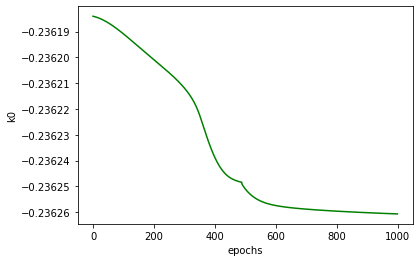

In [47]:
plt.plot(range(1000),k0,c='g')
plt.xlabel('epochs')
plt.ylabel('k0')
plt.show()

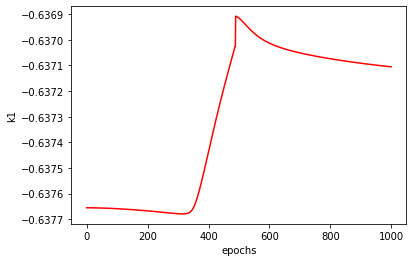

In [46]:
plt.plot(range(1000),k1,c='r')
plt.xlabel('epochs')
plt.ylabel('k1')
plt.show()

## Variation of Cost at each epoch

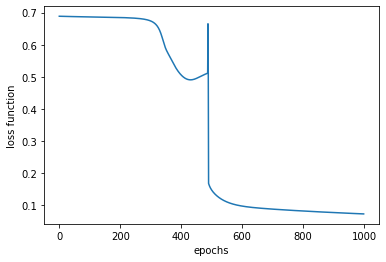

In [35]:
plt.plot(range(1000),loss_function)
plt.xlabel('epochs')
plt.ylabel('loss function')
plt.show()